In [318]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import pydicom as dcm
import numpy as np
import pickle
from striprtf.striprtf import rtf_to_text
import datetime as dt
from IPython.display import clear_output
import queue

In [194]:
with open('./gstt_acc2prob_current.pkl','rb') as f:
    acc2prob = pickle.load(f)

In [195]:
len([a[:-4] for a in os.listdir('/media/dw19/071006ce-9e7a-47fa-8190-707e18dbccd4/T2_1o5T_120_cube_standardized/gstt_again/') if a[:-4] not in acc2prob])

217

In [196]:
df = pd.read_excel('/home/dw19/Downloads/gstt_reports.xlsx')


In [197]:
count = 0
bad = 0
have = 0
diff = {}
prob = {}
rep_dates = {}
for i, row in df.iterrows():
    if row['Exam date'].year==2018:
        if '{' in row['Clinical report']:
            text = row['Clinical report']
            try:
                acc = row['Accession number']
                if os.path.exists('/media/dw19/071006ce-9e7a-47fa-8190-707e18dbccd4/T2_1o5T_120_cube_standardized/gstt_again/'+ acc + '.nii'):
                    diff[acc] = ((pd.to_datetime(re.search('[0-9]{1,2}/[0-9]{1,2}/[0-9]{4}',text[text.find('Report Date'):]).group(0),format='%d/%m/%Y')-pd.to_datetime(row['Exam date'],format='%Y%m/%d/')).days)
                    prob[acc] = acc2prob[acc]
                    rep_dates[acc] = re.search('[0-9]{1,2}/[0-9]{1,2}/[0-9]{4}',text[text.find('Report Date'):]).group(0)
                    count += 1
            except:
                bad += 1
print(count, bad, bad/count)
            

2090 119 0.056937799043062204


In [198]:
df['Event Date'] = df['Exam date'].apply(lambda x: x.strftime('%d/%m/%Y'))

(array([177., 126.,  98.,  75.,  52.,  38.,  40.,  19.,  14.,  20.,  19.,
         19.,  23.,  16.,  19.,  10.,   7.,  16.,  17.,  19.,  17.,  18.,
         13.,   8.,  19.,  15.,  18.,  26.,  19.,  28.,   7.,  13.,  12.,
         17.,  20.,  11.,  13.,  21.,  18.,  18.,  13.,   3.,  12.,  11.,
         15.,  10.,   9.,  15.,   9.,  15.,  13.,  15.,   9.,  14.,   7.,
         10.,  11.,  17.,  11.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 59 Patch objects>)

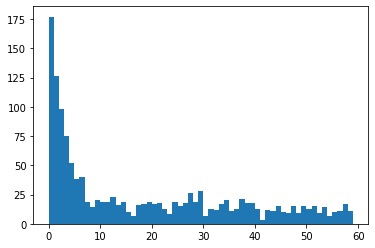

In [199]:
plt.hist(diff.values(), bins=np.arange(0,60, 1))

In [229]:
ab_diff = [diff[a] for a, p in acc2prob.items() if p > 0.5 and a in diff and diff[a] > 1]

In [230]:
hc_diff = [diff[a] for a, p in acc2prob.items() if p < 0.5 and a in diff and diff[a]>1]

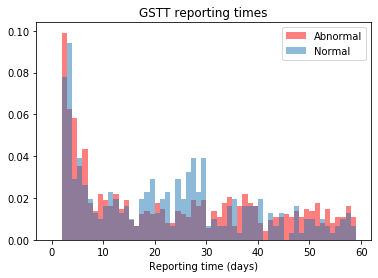

In [231]:

plt.hist(ab_diff, bins=np.arange(0,60, 1), color='red', alpha=0.5,  label='Abnormal', density=True)
plt.hist(hc_diff, bins=np.arange(0,60, 1), alpha=0.5,  label='Normal', density=True)
plt.title('GSTT reporting times')
plt.legend()
plt.xlabel('Reporting time (days)')
plt.savefig('./gstt_reporting_hist_outpatient.pdf')

In [206]:
np.mean(hc_diff), np.mean(ab_diff)

(34.272277227722775, 33.64477933261571)

In [207]:
np.std(hc_diff), np.std(ab_diff)

(26.65047180238056, 26.711728599204303)

In [208]:
keep_accs = [a for a, b in diff.items() if diff[a] >= 1 and a in rep_dates]

In [209]:
df = df[df['Accession number'].isin(keep_accs)]
report_dates = []
for i, row in df.iterrows():
    acc = row['Accession number']
    report_dates.append(rep_dates[acc])


In [210]:
df['Date Last Ver'] = report_dates

In [211]:
df = df[df['Accession number'].isin(keep_accs)]
df = df[df[['Accession number','Exam date','Date Last Ver']].notnull().all(axis=1)].reset_index()

In [212]:
DF = pd.read_csv('/home/dw19/Desktop/reports/20080801 20190131 Neuro and SLAM MRI Heads.csv', encoding = "ISO-8859-1", low_memory=False)


In [215]:
def definePriorityMapping():
    
    priority_list = {}
    priority_list["normal"],priority_list["abnormal"] = 16,12
            
    return priority_list

def getPriorityClass(classes,priority_list):
    priority_class = "normal"
    
    for cl in classes:
        if priority_list[priority_class] > priority_list[cl]:
            priority_class = cl 
    
    return priority_class


In [216]:
priority_list = definePriorityMapping()

In [217]:
with open('../triage_sim/sim_2018_acc2preds.pkl','rb') as f:
    acc2pred = pickle.load(f)
with open('../triage_sim/gstt_sim_2018_granular_nlp_labels','rb') as f:
    acc2gt = pickle.load(f)
with open('../triage_sim/gstt_entire_2018_for_baseline_acc2prob.pkl','rb') as f:
    acc2gt_base = pickle.load(f)
    
new_dict = {}
for k, v in acc2pred.items():
    acc = re.search('RJ[0-9]{9}',k).group(0)
    new_dict[acc] = v

In [218]:
df = df[df['Accession number'].isin(new_dict)]

In [266]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])


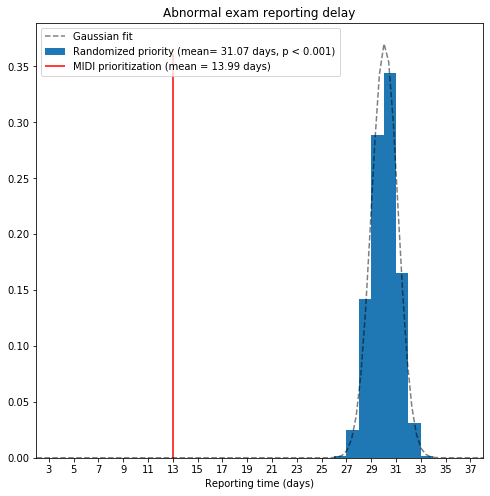

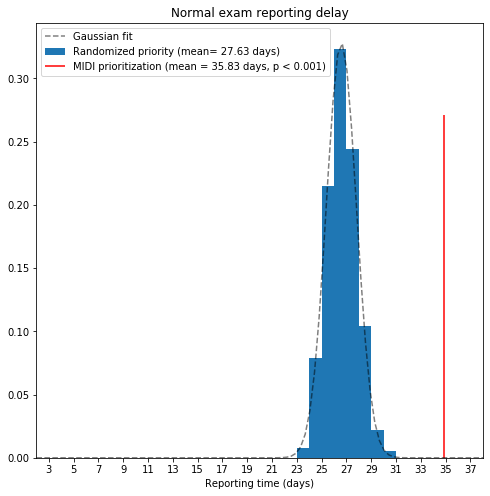

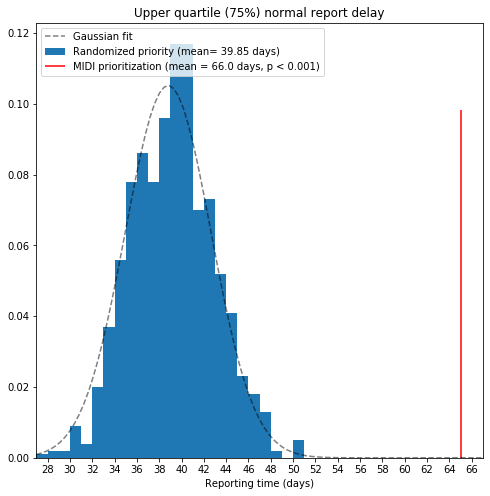

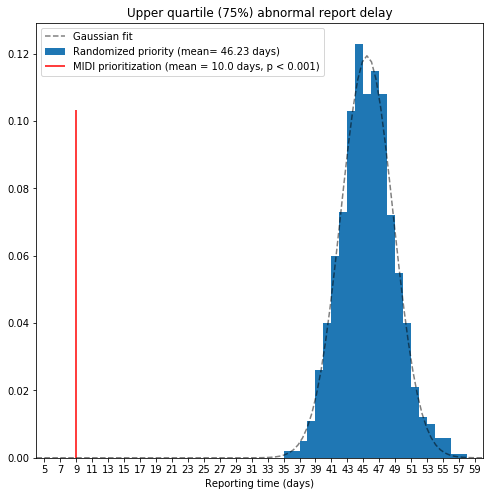

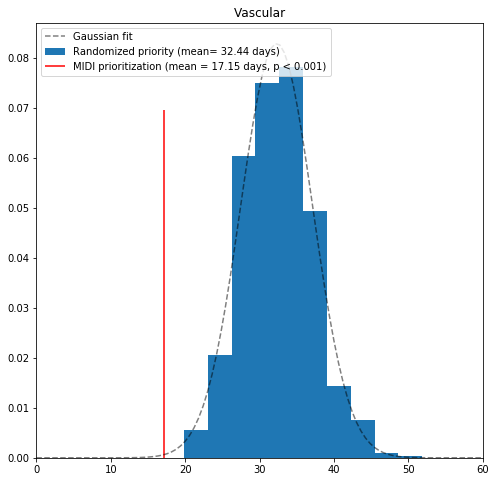

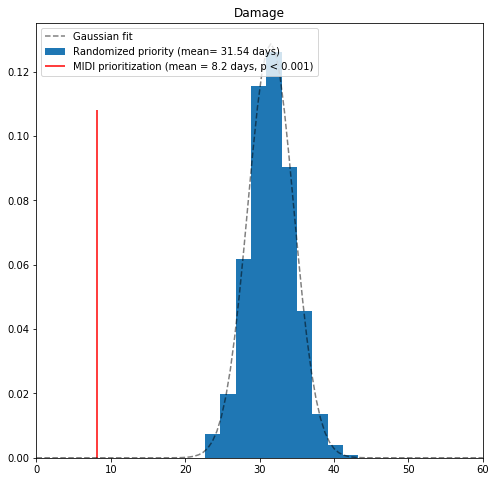

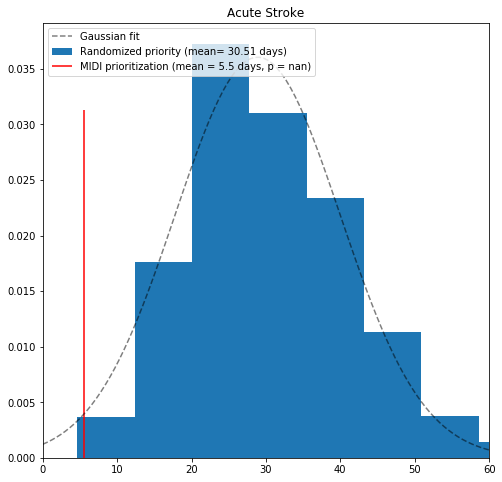

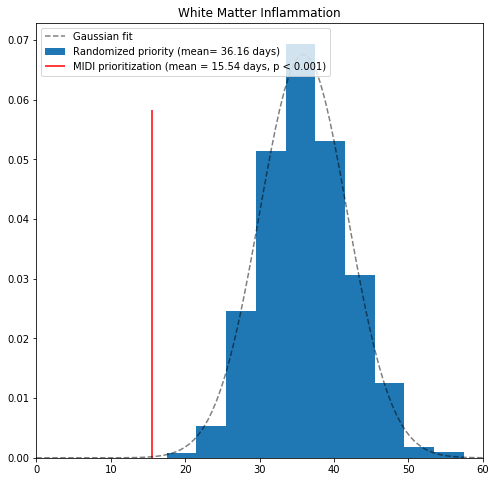

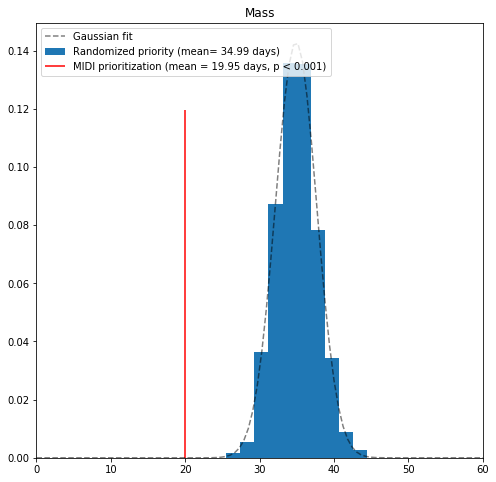

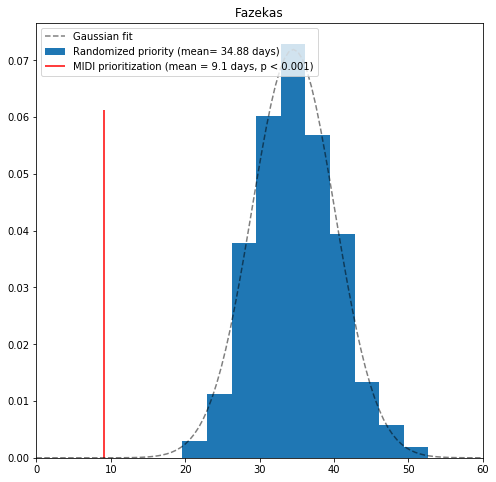

In [442]:
#for cat in [' Vascular ',' Damage ',' Acute Stroke ',' White Matter Inflammation ',' Mass ', ' Fazekas ']:
fifty_means = []
seventy_five_means = []
fifty_normal_means = []
seventy_five_normal_means = []
mean_ab_diffs = []
mean_normal_diffs = []


granular_normal = {}
granular_ab = {}
for cat in [' Vascular ',' Damage ',' Acute Stroke ',' White Matter Inflammation ',' Mass ', ' Fazekas ']:
    granular_normal[cat] = []
    granular_ab[cat] = []



for j in range(1000):
    
    
    gt = []
    preds = []

    for acc in df['Accession number']:
        preds.append(new_dict[acc])
        if acc2prob[acc]>0.9:
            gt.append('abnormal')
        else:
            gt.append('normal')

    df['preds'] = preds
    df['classes'] = gt


    report_delay_real, report_delay_ourPrioritization,report_delay_seqPrioritization, report_delay_randPrioritization = {'normal':{},'abnormal':{}}, {'normal':{},'abnormal':{}}, {'normal':{},'abnormal':{}}, {'normal':{},'abnormal':{}}       
    start_date = dt.datetime.strptime('2018/01/01', "%Y/%m/%d")
    stats_start_date = start_date
    start_date = start_date - dt.timedelta(days=30)

    end_date = dt.datetime.strptime('2019/01/01', "%Y/%m/%d")
    q_priority,q_sequential, q_random = queue.PriorityQueue(),queue.Queue(), queue.PriorityQueue()

    reports_time_bins, events_time_bins = {}, {} 
    exams_dict = {}
    for i, exam in df.iterrows():
        real_reporting_time = (pd.to_datetime(exam['Date Last Ver'],format='%d/%m/%Y') - pd.to_datetime(exam['Event Date'],format='%d/%m/%Y'))/np.timedelta64(1, 'h')
        if real_reporting_time >= 0:
            exams_dict[exam['Accession number']] = exam[['Accession number','Event Date','Date Last Ver','preds','classes']]
            reporting_time_bin_index = int((dt.datetime.strptime(exam['Date Last Ver'], "%d/%m/%Y") - dt.datetime.min).total_seconds()//int(60*60*24))
            if not reporting_time_bin_index in reports_time_bins.keys():
                reports_time_bins[reporting_time_bin_index] = []
            reports_time_bins[reporting_time_bin_index].append(exam['Accession number'])

            event_time_bin_index = int((dt.datetime.strptime(exam['Event Date'], "%d/%m/%Y") - dt.datetime.min).total_seconds()//int(60*60*24))
            if not event_time_bin_index in events_time_bins.keys():
                events_time_bins[event_time_bin_index] = []
            events_time_bins[event_time_bin_index].append(exam['Accession number'])  

    counter,end_loop = 0,int((end_date - start_date).total_seconds()) // int(60*60*24)
    while start_date < end_date:
        current_time_bin_index = int((start_date-dt.datetime.min).total_seconds()) // int(60*60*24)
        if current_time_bin_index in reports_time_bins:
            reported_count = len(reports_time_bins[current_time_bin_index])
        else:
            reported_count = 0
        for i in range(reported_count):  
            if not q_priority.empty():
                class_id_tuple = q_priority.get(timeout=0)
                d = exams_dict[class_id_tuple[1]]#collection.find({'_id':class_id_tuple[1]})[0]               
                NLP_priority_class = getPriorityClass([d['classes']],priority_list)                       
                if dt.datetime.strptime(d['Event Date'], "%d/%m/%Y") >= stats_start_date:
                    report_delay_ourPrioritization[NLP_priority_class][class_id_tuple[1]] = (start_date + dt.timedelta(seconds=60*60*24) - dt.datetime.strptime(d['Event Date'], "%d/%m/%Y")).total_seconds()  / 60.0 / 60.0
            else:
                break 

        for i in range(reported_count):  
            if not q_sequential.empty():
                acc_numb = q_sequential.get(timeout=0)
                d = exams_dict[acc_numb] #collection.find({'_id':acc_numb})[0]               
                NLP_priority_class = getPriorityClass([d['classes']],priority_list)                       
                if dt.datetime.strptime(d['Event Date'], "%d/%m/%Y") >= stats_start_date:
                    report_delay_seqPrioritization[NLP_priority_class][acc_numb] = (start_date + dt.timedelta(seconds=60*60*24) - dt.datetime.strptime(d['Event Date'], "%d/%m/%Y")).total_seconds()  / 60.0 / 60.0
            else:
                break

        for i in range(reported_count):  
            if not q_random.empty():
                class_id_tuple = q_random.get(timeout=0)
                d = exams_dict[class_id_tuple[1]]#collection.find({'_id':class_id_tuple[1]})[0]               
                NLP_priority_class = getPriorityClass([d['classes']],priority_list)                       
                if dt.datetime.strptime(d['Event Date'], "%d/%m/%Y") >= stats_start_date:
                    report_delay_randPrioritization[NLP_priority_class][class_id_tuple[1]] = (start_date + dt.timedelta(seconds=60*60*24) - dt.datetime.strptime(d['Event Date'], "%d/%m/%Y")).total_seconds()  / 60.0 / 60.0
            else:
                break 

            #4) fill the queue for the next time bin
        if current_time_bin_index in events_time_bins.keys(): 
            for acc_numb in events_time_bins[current_time_bin_index]:
                d = exams_dict[acc_numb]
                NLP_priority_class = getPriorityClass([d['classes']],priority_list)
                if np.random.rand()>0.0:
                    confidence = d['preds']           
#                     priority_level = priority_list['normal']
#                     if confidence > 0.0:
#                         pass
#                     else:
#                         confidence = 0
#                         priority_level = priority_level - 4

#                     elif confidence > 0.4:
#                         priority_level = priority_level - 2
#                     elif confidence > 0.2:
#                        priority_level = priority_level - 1  

                    q_priority.put((1-confidence,d['Accession number']))
                    q_sequential.put(d['Accession number'])
                    q_random.put((np.random.rand(),d['Accession number']))

                else:
                    if dt.datetime.strptime(d['Event Date'], "%d/%m/%Y") >= stats_start_date:
                        report_delay_seqPrioritization[NLP_priority_class][d['Accession number']] = (dt.datetime.strptime(d['Date Last Ver'], "%d/%m/%Y") - dt.datetime.strptime(d['Event Date'], "%d/%m/%Y")).total_seconds() / 60.0 / 60.0 
                        report_delay_ourPrioritization[NLP_priority_class][d['Accession number']] = (dt.datetime.strptime(d['Date Last Ver'], "%d/%m/%Y") - dt.datetime.strptime(d['Event Date'], "%d/%m/%Y")).total_seconds() / 60.0 / 60.0
                        report_delay_randPrioritization[NLP_priority_class][d['Accession number']] = (dt.datetime.strptime(d['Date Last Ver'], "%d/%m/%Y") - dt.datetime.strptime(d['Event Date'], "%d/%m/%Y")).total_seconds() / 60.0 / 60.0
                    this_exam_reporting_time_bin_index = int((dt.datetime.strptime(d['Date Last Ver'], "%d/%m/%Y")-dt.datetime.min).total_seconds()) // int(60*60*24)
                    reports_time_bins[this_exam_reporting_time_bin_index].remove(reports_time_bins[this_exam_reporting_time_bin_index][0])

                if dt.datetime.strptime(d['Event Date'], "%d/%m/%Y") >= stats_start_date:    
                    report_delay_real[NLP_priority_class][d['Accession number']] = (dt.datetime.strptime(d['Date Last Ver'], "%d/%m/%Y") - dt.datetime.strptime(d['Event Date'], "%d/%m/%Y")).total_seconds() / 60.0 / 60.0  

        #Move to next bin:
        start_date = start_date + dt.timedelta(seconds=60*60*24)
        counter = counter + 1   
        if counter % 100000 == 0:
            print(counter,"/",end_loop)



    seq_normal_times = list(report_delay_real['normal'].values())
    seq_abnormal_times = list(report_delay_real['abnormal'].values())

    seq_normal_times = np.array(seq_normal_times)/24
    NN = np.percentile(seq_normal_times, 95)
    seq_normal_times = seq_normal_times[seq_normal_times<NN]
    mean = np.mean(seq_normal_times).round(decimals=2)
    std = np.std(seq_normal_times).round(decimals=2)

    seq_abnormal_times = np.array(seq_abnormal_times)/24
    NN = np.percentile(seq_abnormal_times, 95)
    seq_abnormal_times = seq_abnormal_times[seq_abnormal_times<NN]
    ab_mean = np.mean(seq_abnormal_times).round(decimals=2)
    ab_std = np.std(seq_abnormal_times).round(decimals=2)

#     plt.hist(seq_normal_times,bins = np.arange(1, 80, 1),alpha=0.4,color='b', density=True, label='normal: report time = {} +/- {} days'.format(mean, std))
#     plt.hist(seq_abnormal_times,bins = np.arange(1, 80, 1),alpha=0.7,color='r', density=True,label='abnormal: report time = {} +/- {} days'.format(ab_mean, ab_std))
#     plt.legend()
#     plt.ylim([0,0.37])
#     fig = plt.gcf()
#     fig.set_size_inches(8, 8)
#     plt.title('Reporting times (Historical)')
#     #plt.title('Reporting times (MIDI prioritization)')
#     plt.xlabel('Reporting time (days)')
#     plt.savefig('./out_patient_historical.pdf')
#     plt.pause(0.1)

    seq_normal_times = list(report_delay_randPrioritization['normal'].values())
    seq_abnormal_times = list(report_delay_randPrioritization['abnormal'].values())

    seq_normal_times = np.array(seq_normal_times)/24
    NN = np.percentile(seq_normal_times, 99)
    seq_normal_times = seq_normal_times[seq_normal_times<NN]
    mean = np.mean(seq_normal_times).round(decimals=2)
    std = np.std(seq_normal_times).round(decimals=2)

    seq_abnormal_times = np.array(seq_abnormal_times)/24
    NN = np.percentile(seq_abnormal_times, 99)
    seq_abnormal_times = seq_abnormal_times[seq_abnormal_times<NN]
    ab_mean = np.mean(seq_abnormal_times).round(decimals=2)
    ab_std = np.std(seq_abnormal_times).round(decimals=2)
    
    fifty_means.append(np.percentile(seq_abnormal_times, 50))
    seventy_five_means.append(np.percentile(seq_abnormal_times, 75))
    fifty_normal_means.append(np.percentile(seq_normal_times, 50))
    seventy_five_normal_means.append(np.percentile(seq_normal_times, 75))
    mean_ab_diffs.append(ab_mean)
    mean_normal_diffs.append(mean)
    
    if (j+1)%100==0:
        clear_output()

        hist, bin_edges = numpy.histogram(mean_ab_diffs, density=True)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        p0 = [1., np.mean(mean_ab_diffs), 1.]
        coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
        hist_fit = gauss(np.linspace(3,40,100), *coeff)

        plt.hist(mean_ab_diffs, bins=np.arange(3, 40, 1), density=True, label='Randomized priority (mean= {} days, p < 0.001)'.format(round(np.mean(mean_ab_diffs),2)))
        plt.vlines(ord_abnormal_times.mean(), 0.8*0, plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days)'.format(round(np.mean(ord_abnormal_times),2)))
        plt.plot(np.linspace(3,40,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
        bins_labels(np.arange(3, 40, 2))
        plt.title('Abnormal exam reporting delay')
        fig = plt.gcf()
        plt.xlabel('Reporting time (days)')
        fig.set_size_inches(8, 8)
        plt.legend(loc = 'upper left')
        #plt.savefig('./Abnormal_confidence.pdf')
        plt.pause(0.1)


        hist, bin_edges = numpy.histogram(mean_normal_diffs, density=True)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        p0 = [1., np.mean(mean_normal_diffs), 5.]
        coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
        hist_fit = gauss(np.linspace(3,40,100), *coeff)

        plt.hist(mean_normal_diffs, bins=np.arange(3, 40, 1), density=True, label='Randomized priority (mean= {} days)'.format(round(np.mean(mean_normal_diffs),2)))
        plt.vlines(ord_normal_times.mean(), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.001)'.format(round(np.mean(ord_normal_times),2)))
        plt.plot(np.linspace(3,40,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
        bins_labels(np.arange(3, 40, 2))
        plt.title('Normal exam reporting delay')
        fig = plt.gcf()
        plt.legend(loc = 'upper left')
        plt.xlabel('Reporting time (days)')
        fig.set_size_inches(8, 8)
        #plt.savefig('./Normal_confidence.pdf')
        plt.pause(0.1)


        hist, bin_edges = numpy.histogram(seventy_five_normal_means, density=True)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        p0 = [1., np.mean(seventy_five_normal_means), 5.]
        coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
        hist_fit = gauss(np.linspace(28,70,100), *coeff)

        plt.hist(seventy_five_normal_means, bins=np.arange(28, 70, 1),density=True, label='Randomized priority (mean= {} days)'.format(round(np.mean(seventy_five_normal_means),2)))
        bins_labels(np.arange(28, 70, 2))
        plt.vlines(np.percentile(ord_normal_times, 75), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.001)'.format(round(np.percentile(ord_normal_times, 75),2)))
        plt.plot(np.linspace(28,70,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
        plt.title('Upper quartile (75%) normal report delay')
        fig = plt.gcf()
        fig.set_size_inches(8, 8)
        plt.legend(loc = 'upper left')
        plt.xlabel('Reporting time (days)')
        #plt.savefig('./upper_quartile_normal_confidence.pdf')
        plt.pause(0.1)


        hist, bin_edges = numpy.histogram(seventy_five_means, density=True)
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
        p0 = [.14, np.mean(seventy_five_means), 3.2]
        coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
        hist_fit = gauss(np.linspace(5,62,100), *coeff)

        plt.hist(seventy_five_means, bins=np.arange(28, 62, 1),density=True, label='Randomized priority (mean= {} days)'.format(round(np.mean(seventy_five_means),2)))
        bins_labels(np.arange(5, 62, 2))
        plt.vlines(np.percentile(ord_abnormal_times, 75), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.001)'.format(round(np.percentile(ord_abnormal_times, 75),2)))
        plt.plot(np.linspace(5,62,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
        plt.title('Upper quartile (75%) abnormal report delay')
        plt.xlabel('Reporting time (days)')
        fig = plt.gcf()
        fig.set_size_inches(8, 8)
        plt.legend(loc = 'upper left')
        #plt.savefig('./upper_quartile_abnormal_confidence.pdf')
        plt.pause(0.1)
        
        for cat in [' Vascular ',' Damage ',' Acute Stroke ',' White Matter Inflammation ',' Mass ', ' Fazekas ']:  
            hist, bin_edges = numpy.histogram(granular_normal[cat], density=True)
            bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
            p0 = [.14, np.mean(granular_normal[cat]), 3.2]
            coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
            hist_fit = gauss(np.linspace(0,60,100), *coeff)

            plt.plot(np.linspace(0,60,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
            p = stats.norm.cdf(np.mean(granular_ab[cat]), coeff[1], coeff[2])

            plt.hist(granular_normal[cat], density=True, label='Randomized priority (mean= {} days)'.format(round(np.mean(granular_normal[cat]),2)))
            if p< 0.001:
                plt.vlines(np.mean(granular_ab[cat]), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.001)'.format(round(np.mean(granular_ab[cat]),2)))
            elif p< 0.05:
                plt.vlines(np.mean(granular_ab[cat]), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.005)'.format(round(np.mean(granular_ab[cat]),2)))
            else:
                plt.vlines(np.mean(granular_ab[cat]), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p = {})'.format(round(np.mean(granular_ab[cat]),2),round(p,3)))


            plt.title('{}'.format(cat[1:-1]))
            plt.legend(loc = 'upper left')
            plt.xlim([0,60])
            fig = plt.gcf()
            fig.set_size_inches(8, 8)
            plt.pause(0.1)
            fig.savefig('./{}_test.pdf'.format(cat[1:-1]))


#     plt.hist(seq_normal_times,bins = np.arange(1, 80, 1),alpha=0.4,color='b', density=False, label='normal: report time = {} +/- {} days'.format(mean, std))
#     plt.hist(seq_abnormal_times,bins = np.arange(1, 80, 1),alpha=0.7,color='r', density=False,label='abnormal: report time = {} +/- {} days'.format(ab_mean, ab_std))
#     plt.legend()
#     #plt.ylim([0,0.35])
#     plt.title('Reporting times (random prioritization)')
#     plt.pause(0.1)


    ord_normal_times = list(report_delay_ourPrioritization['normal'].values())
    ord_abnormal_times = list(report_delay_ourPrioritization['abnormal'].values())

    ord_normal_times = np.array(ord_normal_times)/24
    NN = np.percentile(ord_normal_times, 95)
    ord_normal_times = ord_normal_times[ord_normal_times<NN]
    mean = np.mean(ord_normal_times).round(decimals=2)
    std = np.std(ord_normal_times).round(decimals=2)

    ord_abnormal_times = np.array(ord_abnormal_times)/24
    NN = np.percentile(ord_abnormal_times, 95)
    ord_abnormal_times = ord_abnormal_times[ord_abnormal_times<NN]
    ab_mean = np.mean(ord_abnormal_times).round(decimals=2)
    ab_std = np.std(ord_abnormal_times).round(decimals=2)
    
    diff = {}
    for cat in [' Vascular ',' Damage ',' Acute Stroke ',' White Matter Inflammation ',' Mass ', ' Fazekas ']:
        diff[cat] = []
        for acc in df['Accession number']:
            if acc2gt[cat][acc]>0.95:
                if acc in report_delay_randPrioritization['abnormal']:
                    diff[cat].append(report_delay_randPrioritization['abnormal'][acc])
                elif acc in report_delay_randPrioritization['normal']:
                    diff[cat].append(report_delay_randPrioritization['normal'][acc])
        granular_normal[cat].append(np.mean(diff[cat])/24)
        
    
    diff = {}
    for cat in [' Vascular ',' Damage ',' Acute Stroke ',' White Matter Inflammation ',' Mass ', ' Fazekas ']:
        diff[cat] = []
        for acc in df['Accession number']:
            if acc2gt[cat][acc]>0.95:
                if acc in report_delay_ourPrioritization['abnormal']:
                    diff[cat].append(report_delay_ourPrioritization['abnormal'][acc])
                elif acc in report_delay_ourPrioritization['normal']:
                    diff[cat].append(report_delay_ourPrioritization['normal'][acc])
        granular_ab[cat].append(np.mean(diff[cat])/24)
        

        
#     plt.hist(ord_normal_times,bins = np.arange(1, 80, 1),alpha=0.4,color='b', density=True, label='normal: report time = {} +/- {} days'.format(mean, std))
#     plt.hist(ord_abnormal_times,bins = np.arange(1, 80, 1),alpha=0.7,color='r', density=True,label='abnormal: report time = {} +/- {} days'.format(ab_mean, ab_std))
#     plt.legend()
#     fig = plt.gcf()
#     fig.set_size_inches(8, 8)
#     plt.ylim([0,0.37])

#     plt.title('Reporting times (MIDI prioritization)')
#     plt.xlabel('Reporting time (days)')
#     plt.savefig('./out_patient_MIDI.pdf')
#     plt.pause(0.1)
#     break



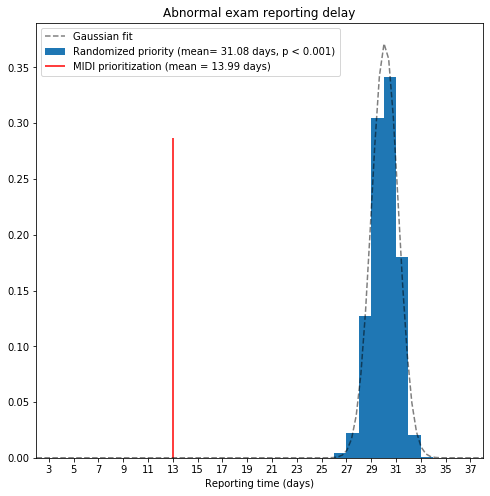

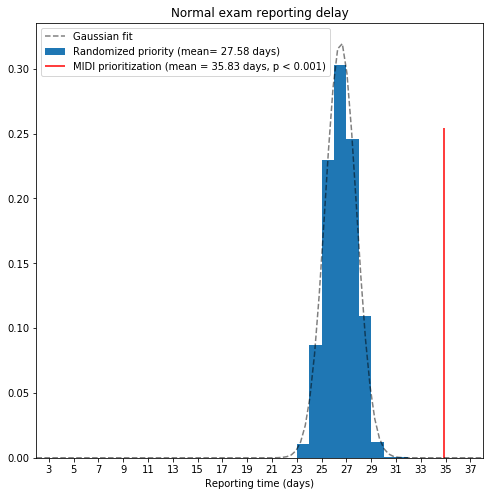

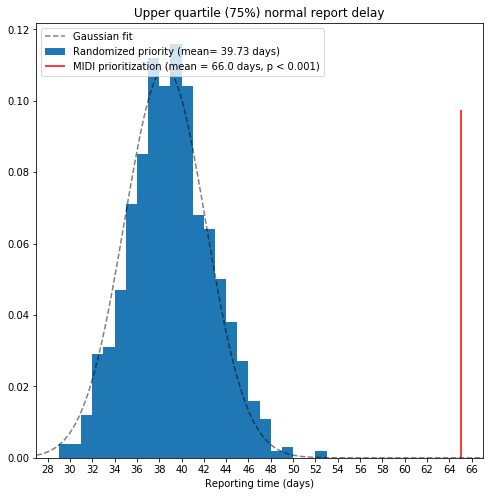

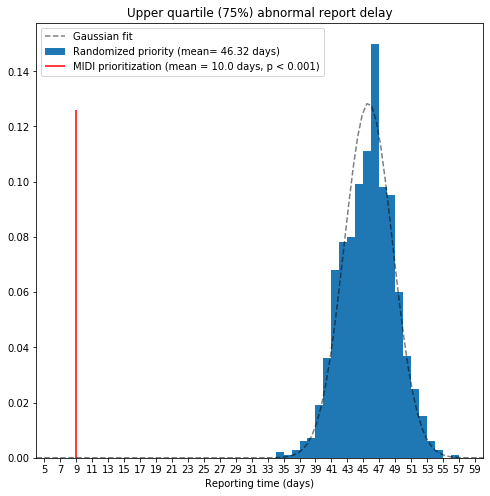

In [441]:
clear_output()

hist, bin_edges = numpy.histogram(mean_ab_diffs, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
p0 = [1., np.mean(mean_ab_diffs), 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
hist_fit = gauss(np.linspace(3,40,100), *coeff)

plt.hist(mean_ab_diffs, bins=np.arange(3, 40, 1), density=True, label='Randomized priority (mean= {} days, p < 0.001)'.format(round(np.mean(mean_ab_diffs),2)))
plt.vlines(ord_abnormal_times.mean(), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days)'.format(round(np.mean(ord_abnormal_times),2)))
plt.plot(np.linspace(3,40,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
bins_labels(np.arange(3, 40, 2))
plt.title('Abnormal exam reporting delay')
fig = plt.gcf()
plt.xlabel('Reporting time (days)')
fig.set_size_inches(8, 8)
plt.legend(loc = 'upper left')
plt.savefig('./Abnormal_confidence.pdf')
plt.pause(0.1)


hist, bin_edges = numpy.histogram(mean_normal_diffs, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
p0 = [1., np.mean(mean_normal_diffs), 5.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
hist_fit = gauss(np.linspace(3,40,100), *coeff)

plt.hist(mean_normal_diffs, bins=np.arange(3, 40, 1), density=True, label='Randomized priority (mean= {} days)'.format(round(np.mean(mean_normal_diffs),2)))
plt.vlines(ord_normal_times.mean(), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.001)'.format(round(np.mean(ord_normal_times),2)))
plt.plot(np.linspace(3,40,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
bins_labels(np.arange(3, 40, 2))
plt.title('Normal exam reporting delay')
fig = plt.gcf()
plt.legend(loc = 'upper left')
plt.xlabel('Reporting time (days)')
fig.set_size_inches(8, 8)
plt.savefig('./Normal_confidence.pdf')
plt.pause(0.1)


hist, bin_edges = numpy.histogram(seventy_five_normal_means, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
p0 = [1., np.mean(seventy_five_normal_means), 5.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
hist_fit = gauss(np.linspace(28,70,100), *coeff)

plt.hist(seventy_five_normal_means, bins=np.arange(28, 70, 1),density=True, label='Randomized priority (mean= {} days)'.format(round(np.mean(seventy_five_normal_means),2)))
bins_labels(np.arange(28, 70, 2))
plt.vlines(np.percentile(ord_normal_times, 75), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.001)'.format(round(np.percentile(ord_normal_times, 75),2)))
plt.plot(np.linspace(28,70,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
plt.title('Upper quartile (75%) normal report delay')
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.legend(loc = 'upper left')
plt.xlabel('Reporting time (days)')
plt.savefig('./upper_quartile_normal_confidence.pdf')
plt.pause(0.1)


hist, bin_edges = numpy.histogram(seventy_five_means, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
p0 = [.14, np.mean(seventy_five_means), 3.2]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
hist_fit = gauss(np.linspace(5,62,100), *coeff)

plt.hist(seventy_five_means, bins=np.arange(28, 62, 1),density=True, label='Randomized priority (mean= {} days)'.format(round(np.mean(seventy_five_means),2)))
bins_labels(np.arange(5, 62, 2))
plt.vlines(np.percentile(ord_abnormal_times, 75), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.001)'.format(round(np.percentile(ord_abnormal_times, 75),2)))
plt.plot(np.linspace(5,62,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
plt.title('Upper quartile (75%) abnormal report delay')
plt.xlabel('Reporting time (days)')
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.legend(loc = 'upper left')
plt.savefig('./upper_quartile_abnormal_confidence.pdf')
plt.pause(0.1)


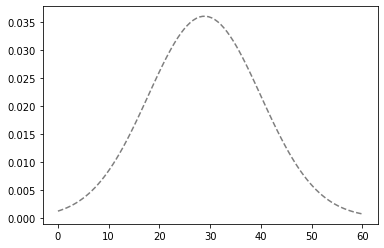

In [450]:
cat = ' Acute Stroke '
hist, bin_edges = numpy.histogram(granular_normal[cat], density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
p0 = [.14, np.mean(granular_normal[cat]), 3.2]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
hist_fit = gauss(np.linspace(0,60,100), *np.abs(coeff))

plt.plot(np.linspace(0,60,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
p = stats.norm.cdf(np.mean(granular_ab[cat]), coeff[1], np.abs(coeff[2]))

In [451]:
p

0.017375397234373615

In [447]:
coeff

array([  0.03609049,  28.89402707, -11.08065013])

In [438]:
np.std(mean_ab_diffs)

1.0390797250933155

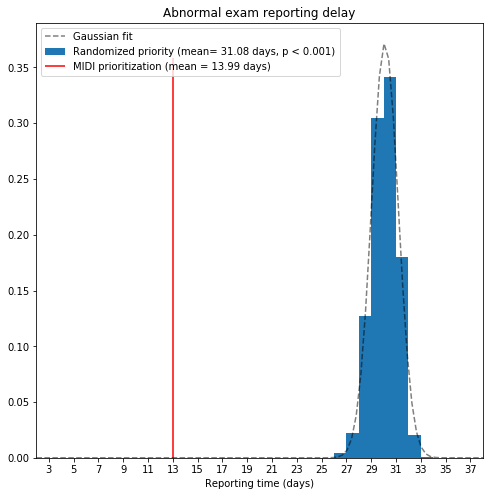

In [439]:
hist, bin_edges = numpy.histogram(mean_ab_diffs, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
p0 = [1., np.mean(mean_ab_diffs), 1]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
hist_fit = gauss(np.linspace(3,40,100), *coeff)

plt.hist(mean_ab_diffs, bins=np.arange(3, 40, 1), density=True, label='Randomized priority (mean= {} days, p < 0.001)'.format(round(np.mean(mean_ab_diffs),2)))
plt.vlines(ord_abnormal_times.mean(), 0.8*0, plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days)'.format(round(np.mean(ord_abnormal_times),2)))
plt.plot(np.linspace(3,40,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
bins_labels(np.arange(3, 40, 2))
plt.title('Abnormal exam reporting delay')
fig = plt.gcf()
plt.xlabel('Reporting time (days)')
fig.set_size_inches(8, 8)
plt.legend(loc = 'upper left')
#plt.savefig('./Abnormal_confidence.pdf')
plt.pause(0.1)

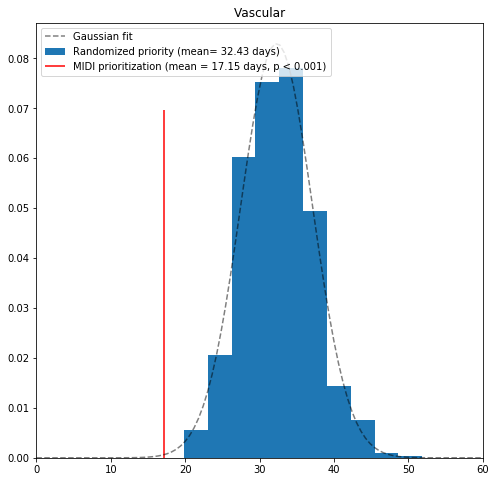

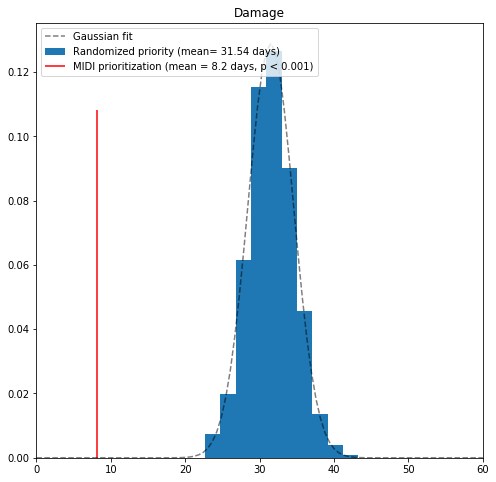

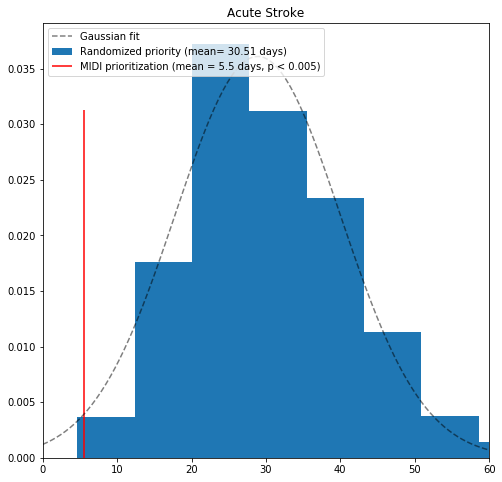

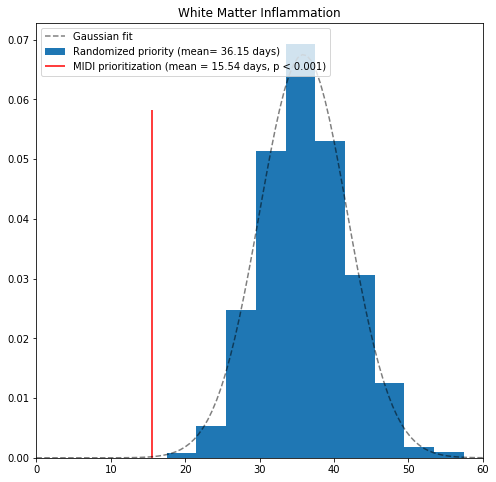

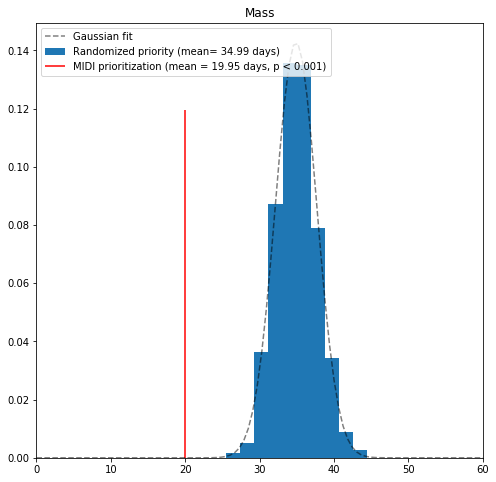

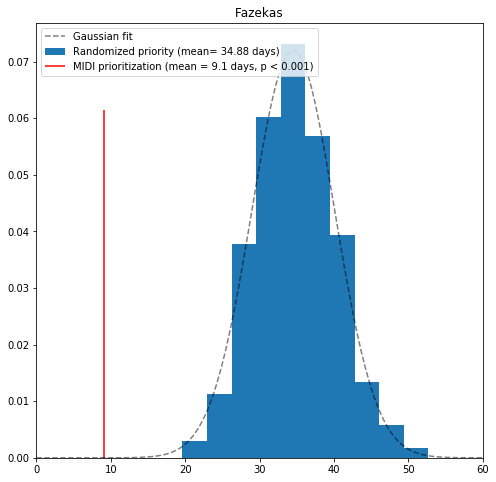

In [452]:
for cat in [' Vascular ',' Damage ',' Acute Stroke ',' White Matter Inflammation ',' Mass ', ' Fazekas ']:  
    hist, bin_edges = numpy.histogram(granular_normal[cat], density=True)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    p0 = [.14, np.mean(granular_normal[cat]), 3.2]
    coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
    hist_fit = gauss(np.linspace(0,60,100), *coeff)

    plt.plot(np.linspace(0,60,100), hist_fit,linestyle='--', label='Gaussian fit', color='black',alpha=0.5)
    p = stats.norm.cdf(np.mean(granular_ab[cat]), coeff[1], np.abs(coeff[2]))

    plt.hist(granular_normal[cat], density=True, label='Randomized priority (mean= {} days)'.format(round(np.mean(granular_normal[cat]),2)))
    if p< 0.001:
        plt.vlines(np.mean(granular_ab[cat]), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.001)'.format(round(np.mean(granular_ab[cat]),2)))
    elif p< 0.05:
        plt.vlines(np.mean(granular_ab[cat]), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p < 0.005)'.format(round(np.mean(granular_ab[cat]),2)))
    else:
        plt.vlines(np.mean(granular_ab[cat]), 0, 0.8*plt.gca().get_ylim()[1], colors='red', linestyles='solid', label = 'MIDI prioritization (mean = {} days, p = {})'.format(round(np.mean(granular_ab[cat]),2),round(p,3)))


    plt.title('{}'.format(cat[1:-1]))
    plt.legend(loc = 'upper left')
    plt.xlim([0,60])
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    plt.pause(0.1)
    fig.savefig('./{}_test.pdf'.format(cat[1:-1]))

In [434]:
diff = {}
for cat in [' Vascular ',' Damage ',' Acute Stroke ',' White Matter Inflammation ',' Mass ', ' Fazekas ']:
    diff[cat] = []
    for acc in df['Accession number']:
        if acc2gt[cat][acc]>0.5:
            if acc in report_delay_ourPrioritization['abnormal']:
                diff[cat].append(report_delay_ourPrioritization['abnormal'][acc])
            elif acc in report_delay_ourPrioritization['normal']:
                diff[cat].append(report_delay_ourPrioritization['normal'][acc])
    print(cat, len(diff[cat]), np.mean(diff[cat])/24,'\n\n')

 Vascular  254 23.0 


 Damage  188 12.77127659574468 


 Acute Stroke  20 5.1000000000000005 


 White Matter Inflammation  138 15.46376811594203 


 Mass  371 24.412398921832885 


 Fazekas  116 8.931034482758621 




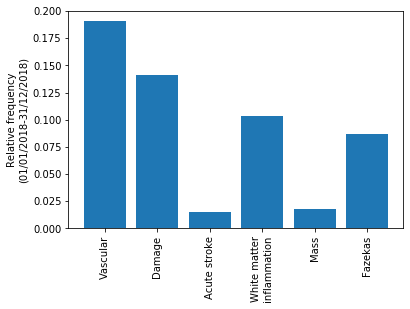

In [435]:

plt.bar(np.arange(0, 6),np.array([254,188, 20,138,24,116])/len(df))
ax = plt.gca()
plt.xticks(np.arange(0, 6),[cat[1:-1] for cat in [' Vascular ',' Damage ',' Acute stroke ',' White matter\ninflammation ',' Mass ', ' Fazekas ']], rotation=90)
plt.ylabel('Relative frequency\n(01/01/2018-31/12/2018)')
plt.savefig('./abnormality_count_norm.pdf')

In [ ]:
train = pd.read_csv('../generalization/kch_gstt_train.csv')

In [ ]:
DF = pd.read_csv('../generalization/kch_gstt_train.csv')

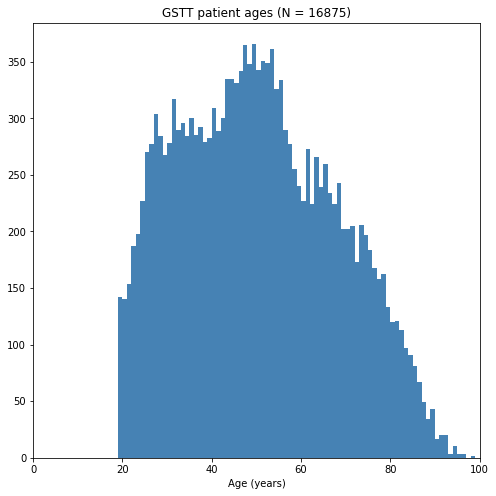

In [126]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
arr = DF[DF['file_name'].str.contains('RJZ')]['Age'].values
arr = DF[~DF['file_name'].str.contains('RJZ')]['Age'].values
ax.hist(arr, bins=np.arange(18, 100, 1), color='steelblue', label='KCH', alpha = 1)
#ax.hist(arr2, bins=np.arange(18, 100, 1),color= 'gold',label='GSTT',alpha=0.5)
ax.set_title('GSTT patient ages (N = {})'.format(len(arr)))
ax.set_xlabel('Age (years)')
ax.set_xlim([0, 100])
plt.pause(0.1)
fig.savefig('../triage_sim/gstt_ages.pdf')

In [166]:
DF[~DF['file_name'].str.contains('RJZ')]['Age'].std()

17.445678808746102

In [163]:
len(DF[~DF['file_name'].str.contains('RJZ')]),(DF[~DF['file_name'].str.contains('RJZ')]['prob']>0.5).sum(), (DF[~DF['file_name'].str.contains('RJZ')]['prob']>0.5).sum()/len(DF[~DF['file_name'].str.contains('RJZ')])

(16875, 9766, 0.578725925925926)

In [164]:
DF[~DF['file_name'].str.contains('RJZ')]['ID'].unique().shape

(14245,)

In [137]:
gold = pd.read_csv('../generalization/kch_test.csv')

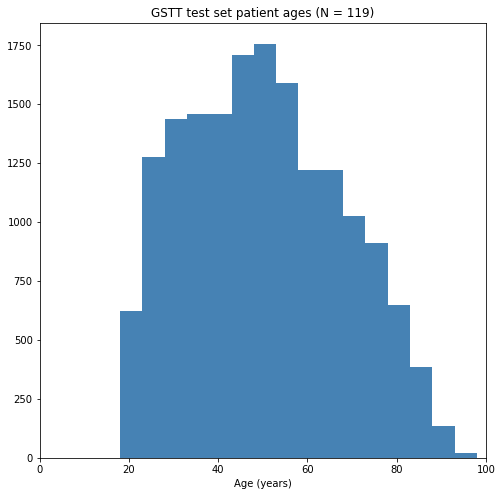

(array([12., 13., 10., 12., 15., 11., 15.,  9., 15.,  7.]),
 array([20. , 26.1, 32.2, 38.3, 44.4, 50.5, 56.6, 62.7, 68.8, 74.9, 81. ]),
 <a list of 10 Patch objects>)

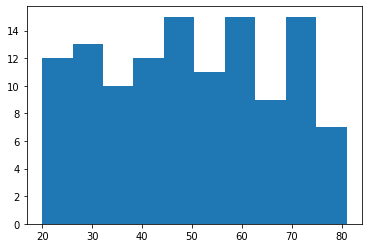

In [192]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.hist(DF[~DF['file_name'].str.contains('RJZ')]['Age'].values, bins=np.arange(18, 100, 5), color='steelblue', label='KCH', alpha = 1)
#ax.hist(arr2, bins=np.arange(18, 100, 1),color= 'gold',label='GSTT',alpha=0.5)
ax.set_title('GSTT test set patient ages (N = {})'.format(len(gold)))
ax.set_xlabel('Age (years)')
ax.set_xlim([0, 100])
plt.pause(0.1)
plt.hist(gold['Age'].values)
#fig.savefig('../triage_sim/gstt_test_ages.pdf')

In [147]:
gold['Age'].mean(), gold['Age'].std()

(49.35056179775281, 15.884245719298724)

In [161]:
gold['label'].sum()

341

In [ ]:
new_dict = {}
for k, v in acc2pred.items:
    acc = re.search('RJ[0-9]{9}',k).group(0)
    new_dict[acc] = v

In [ ]:
plt.plot(sorted(new_dict.values())

In [394]:
lens = []
for _, v in reports_time_bins.items():
    lens.append(len)

In [ ]:
plt.hist()

In [413]:
np.random.rand()

0.5815997696160468

In [167]:
gold = pd.read_csv('../generalization/kch_gstt_test.csv')

In [168]:
gold = gold[~gold['Accession'].str.contains('RJZ')]

In [171]:
accs = pd.read_csv('/home/dw19/Downloads/gstt_ayisha_250_first100.csv')['Accession number']

In [179]:
df[df['Accession number'].isin(accs)]['Age at exam date'].std()

16.830394933793176

In [180]:
gold['label'].sum()

57.0

In [181]:
len(gold)

119

In [182]:
57/119*250


119.74789915966387

In [183]:
119.747/250

0.478988

In [184]:
57/119

0.4789915966386555

In [414]:
temp = pd.read_excel('/home/dw19/Downloads/gstt_reports.xlsx')

In [415]:
len(df)

1333

In [416]:
(temp['Exam date'].dt.year==2018).sum()

11625